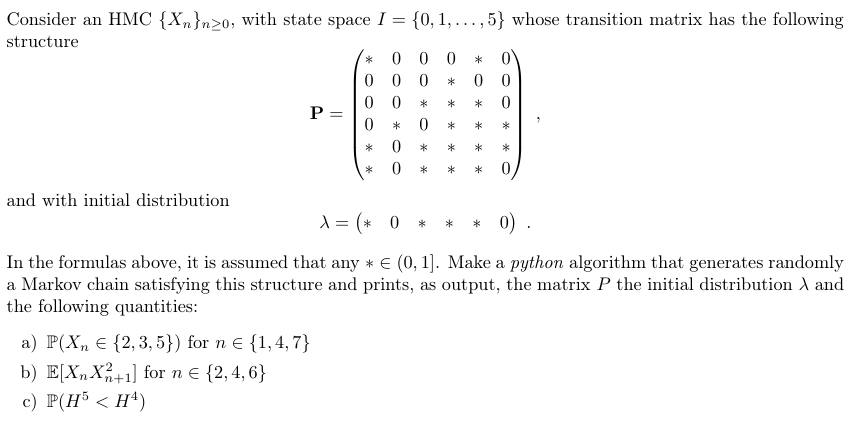

In [1]:
from IPython.display import Image
Image("model.png")

In [2]:
import numpy as np
import random as rm
import array
from numpy.linalg import matrix_power

In [3]:
I = range(0,6)

# here I randomly generate a matrix and initial distribution and adjust them to the given form: 

P = [[0 for x in range(6)] for x in range(6)]
lam = [0 for x in range(6)]
for i in range(6):
    if i == 0:
        for j in [0,4]:
            P[i][j] = 1 - rm.random()
    elif i==1:
        for j in [3]:
            P[i][j] = 1 - rm.random()
    elif i==2:
        for j in [2,3,4]:
            P[i][j] = 1 - rm.random()
    elif i==3:
        for j in [1,3,4,5]:
            P[i][j] = 1 - rm.random()
    elif i==4:
        for j in [0,2,3,4,5]:
            P[i][j] = 1 - rm.random()
    elif i==5:
        for j in [0,2,3,4]:
            P[i][j] = 1 - rm.random()
    P[i] = np.asarray(P[i])/sum(np.asarray(P[i]))

for i in [0,2,3,4]:
    lam[i] = 1 - rm.random()
    
lam = np.asarray(np.asarray(lam)/sum(np.asarray(lam)))
P = np.asarray(P)

In [4]:
# From here, generate m(=1000) chains of length n(=1000) wrt the given matrix: 

m = 1000;
n = 1000;
X = [0 for x in range(n)]
Y = X * m;

# counts of each translation and initial state and (c)
count_tran = [[0 for x in range(6)] for x in range(6)]
count_init = [0 for x in I]
count_c = 0

for j in range(0,m-1):
    hit4 = 0
    hit5 = 0
    X[0] = rm.choices(I,lam)[0]
    if X[0] == 5:
        count_c += 1
        hit4 += 1
    for i in range(0,n-1):
        for k in I: 
            if X[i] == k:
                X[i+1] = rm.choices(I,P[k])[0]
                count_tran[X[i]][X[i+1]] += 1
                if hit4 == 0 and hit5 == 0:
                    if X[i] == 5:
                        hit5 += 1
                        count_c += 1
                    elif X[i] == 4:
                        hit4 += 1
            k += 1
        i += 1
        count_init[X[0]] += 1
    Y[j] = X
    j += 1

In [5]:
# compute the transition matrix and intiial distribution according to the generated chains

count_init = np.asarray(count_init)
initial_distribution = count_init / sum(count_init)

count_tran = np.asarray(count_tran)
transition_matrix = [[]*6]*6
for i in range(6):
    transition_matrix[i] = count_tran[i] / sum(count_tran[i])
transition_matrix = np.asarray(transition_matrix)

print("The initial distribution is:\n lambda = \n",  initial_distribution
     ,"\n\n The translation matrix is:\n P=\n",
     transition_matrix)

The initial distribution is:
 lambda = 
 [0.37037037 0.         0.38638639 0.21821822 0.02502503 0.        ] 

 The translation matrix is:
 P=
 [[0.16220083 0.         0.         0.         0.83779917 0.        ]
 [0.         0.         0.         1.         0.         0.        ]
 [0.         0.         0.42076162 0.57337218 0.00586621 0.        ]
 [0.         0.31925851 0.         0.3287651  0.19075919 0.16121721]
 [0.11299781 0.         0.10998271 0.05270561 0.51389843 0.21041544]
 [0.48499143 0.         0.22119615 0.23548355 0.05832887 0.        ]]


In [6]:
# compute (a) according to P(X_n in {2,3,5}) = (\lambda P^n)_2+(\lambda P^n)_3+(\lambda P^n)_5
# denote P(X_n in {2,3,5}) as P235(n), then

def a(n): 
    Pn = matrix_power(transition_matrix,n)
    distr_n = initial_distribution.dot(Pn)
    prob = distr_n[2]+distr_n[3]+distr_n[5]
    print("For n=", n ,", probability =",prob)

a(1)
a(4)
a(7)

For n= 1 , probability = 0.5003797604315645
For n= 4 , probability = 0.5049584504754705
For n= 7 , probability = 0.49762612171363374


In [7]:
# compute (b). E[X_n X_{n+1}^2]=\sum_{i,j \in I}ij^2 p_{ij}(\lambda P^n)_i.

def b(n):
    Pn = matrix_power(transition_matrix,n)
    distr_n = initial_distribution.dot(Pn)
    expectation = 0
    for i in range(6):
        for j in range(6):
            expectation += i*j*j*transition_matrix[i][j]*distr_n[i]
    print("Expectation for n=", n," is ", expectation)

b(2)
b(4)
b(6)

Expectation for n= 2  is  31.296711500379146
Expectation for n= 4  is  30.665522873927767
Expectation for n= 6  is  30.85249669086055


In [8]:
# compute (c)

print("Probability = ", count_c/m)

Probability =  0.275
